In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing

from sklearn.preprocessing import StandardScaler

### NOT ALL PACKAGES WILL BE USED, WILL BE EDITED AS I GO

# Model tuning, model selection

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score


# metrics and evaluation

from sklearn.metrics import mean_squared_error, r2_score

import dmba
from dmba import classificationSummary, gainsChart, liftChart, regressionSummary, stepwise_selection, plotDecisionTree
from dmba.metric import AIC_score, adjusted_r2_score, BIC_score

# regression models
from sklearn.linear_model import LinearRegression

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


# classification models

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [18]:
# importing data

qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide_filtered.csv", index_col = 0)
rb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_rb_wide_filtered.csv", index_col = 0)
wr = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_wr_wide_filtered.csv", index_col = 0)
te = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_te_wide_filtered.csv", index_col = 0)

In [19]:
# lets focus on QBs first



qb = pd.read_csv("C:/Users/steph/OneDrive/Documents/Data Projects/Fantasy/ff_qb_wide.csv", index_col = 0)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_20

In [20]:
pd.set_option('display.max_columns', None)

qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,adp_2023,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_20

In [21]:
years = ['2019', '2020', '2021', '2022']

# Generate the list of column names using list comprehension and str.replace()
last_yr_team_stats = [base_column + year for year in years for base_column in \
           ['totyd_last_yr_tm_stat_', 'pts_scored_last_yr_tm_stat_', 'rushy_last_yr_tm_stat_',
           'passy_last_yr_tm_stat_']]

dfs = [qb, rb, wr, te]

for i in dfs:
    i[last_yr_team_stats] = i[last_yr_team_stats].replace(0, np.nan)

### Initial modeling

Let's try models that don't need too much pre-processing like decision trees and then random forests.

2022 will be the testing year. 2019, 2020, and 2021 data will be used to train the model.

Is there a way to, perhaps, train a model on 2019 data to predict 2020 scores, save what it knows about that, then 2020 to predict 2021, then 2021 to 2022 and aggergate the model's knowledge of how one year will affect the next?

In [22]:
nulls = {'te_prem_pts_pg_5ptd_2019': 0, 'te_prem_pts_pg_5ptd_2020': 0,'te_prem_pts_pg_5ptd_2021': 0,
                             'te_prem_pts_pg_5ptd_2022': 0 , 'te_prem_pts_p5td_2019': 0, 'te_prem_pts_p5td_2020': 0 ,
                             'te_prem_pts_p5td_2021': 0, 'te_prem_pts_p5td_2022': 0}

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

qb.loc[:, subset] = qb.loc[:, subset].fillna(0)

## 2023 data to utilize in model to make 2023 predictions

In [23]:
### utilizing beautifulsoup to scrape ff22 data!

import requests
from bs4 import BeautifulSoup

# 2023 rankings (current year)

# URL of the website
rank_url = "https://fantasyfootballcalculator.com/adp/half-ppr/12-team/all"

# Send a GET request to the URL
response = requests.get(rank_url)

# Create a BeautifulSoup object with the content of the response
soup = BeautifulSoup(response.content, 'html.parser')

# Find the main table on the page
table = soup.find("table", class_="table adp")

# Find all rows in the table (excluding the header row)
rows = table.find_all("tr")[1:]

# Define lists to store the data
data = []
header = []

# Extract the column names from the header row
for th in table.find_all("th"):
    header.append(th.text.strip())

# Iterate over each row and extract the data
for row in rows:
    cells = row.find_all("td")
    row_data = [cell.text.strip() for cell in cells]
    data.append(row_data)

# Create a DataFrame from the data
ranks_23 = pd.DataFrame(data, columns=header)

# Print the DataFrame
print(ranks_23)

       #   Pick                 Name  Pos Team Bye Overall Std.Dev   High  \
0      1   1.01  Christian McCaffrey   RB   SF   9     1.4     0.7   1.01   
1      2   1.02        Austin Ekeler   RB  LAC   5     2.1     0.8   1.01   
2      3   1.02     Justin Jefferson   WR  MIN  13     2.2     0.9   1.01   
3      4   1.04        Ja'Marr Chase   WR  CIN   7     4.0     1.2   1.01   
4      5   1.05       Saquon Barkley   RB  NYG  13     5.2     1.2   1.02   
..   ...    ...                  ...  ...  ...  ..     ...     ...    ...   
227  228  15.08   Cincinnati Defense  DEF  CIN   7   176.4     9.7  14.12   
228  229  15.10       Darius Slayton   WR  NYG  13   178.0    15.7  14.02   
229  230  15.10         Robert Woods   WR  HOU   7   178.4    22.2  12.10   
230  231  15.12   Pittsburgh Defense  DEF  PIT   6   179.6    25.9  10.01   
231  232  16.06  LA Chargers Defense  DEF  LAC   5   186.2    14.8  12.10   

       Low TimesDrafted Graph  
0     1.05          447        
1     1.04 

In [24]:
# let's keep only relevant positions (QB, RB, WR, and TE)

ranks_23 = ranks_23.loc[ranks_23['Pos'].isin(['QB', 'RB', 'TE', 'WR'])]

# let's keep only relevant columns
ranks_23 = ranks_23[['#', 'Name', 'Pos', 'Team']]
ranks_23.rename(columns = {'#': 'adp'}, inplace = True)

ranks_23 = ranks_23.set_index('Name')

In [25]:
ranks_23.head()

,adp,Pos,Team
Name,,,
Christian McCaffrey,1,RB,SF
Austin Ekeler,2,RB,LAC
Justin Jefferson,3,WR,MIN
Ja'Marr Chase,4,WR,CIN
Saquon Barkley,5,RB,NYG


In [26]:
qb = qb.join(ranks_23['adp'], how = 'left')
rb = rb.join(ranks_23['adp'], how = 'left')
wr = wr.join(ranks_23['adp'], how = 'left')
te = te.join(ranks_23['adp'], how = 'left')

# dropping old adp_2023 added from earlier notebook
qb.drop(columns = ['adp_2023'], inplace = True)
rb.drop(columns = ['adp_2023'], inplace = True)
wr.drop(columns = ['adp_2023'], inplace = True)
te.drop(columns = ['adp_2023'], inplace = True)

qb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
rb.rename(columns = {'adp': 'adp_2023'}, inplace = True)
wr.rename(columns = {'adp': 'adp_2023'}, inplace = True)
te.rename(columns = {'adp': 'adp_2023'}, inplace = True)

In [27]:
qb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,1std_2023,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,age_2023,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,aggressiveness_2023,attempts_2019,attempts_2020,attempts_2021,attempts_2022,attempts_2023,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_distance_2023,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_differential_2023,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_air_yards_to_sticks_2023,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_completed_air_yards_2023,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_intended_air_yards_2023,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_catch_2023,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_rush_2023,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_per_tgt_2023,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,avg_time_to_throw_2023,cmp_2019,cmp_2020,cmp_2021,cmp_2022,cmp_2023,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,completion_percentage_above_expectation_2023,defense_2019,defense_2020,defense_2021,defense_2022,defense_2023,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,dkpt_2023,epa_total_2019,epa_total_2020,epa_total_2021,epa_total_2022,epa_total_2023,exp_sack_2019,exp_sack_2020,exp_sack_2021,exp_sack_2022,exp_sack_2023,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_completion_percentage_2023,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fantasypoints_2023,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fdpt_2023,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_gm_2023,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fp_per_opp_2023,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbles_2023,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,fumbleslost_2023,g_2019,g_2020,g_2021,g_2022,g_2023,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_2023,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_out_or_questionable_2023,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,games_questionable_2023,gs_2019,gs_2020,gs_2021,gs_2022,gs_2023,height_2019,height_2020,height_2021,height_2022,height_2023,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_2023,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_fp_5ptd_2023,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,hppr_pts_pg_5ptd_2023,int_2019,int_2020,int_2021,int_2022,int_2023,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,interceptions_2023,losses_2019,losses_2020,losses_2021,losses_2022,losses_2023,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_air_distance_2023,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,max_completed_air_distance_2023,next_season_2019,next_season_2020,next_season_2021,next_season_2022,next_season_2023,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,non_pass_tds_2023,offense_2019,offense_2020,offense_2021,offense_2022,offens

### QB Modeling

Setting up a loop to continually train a model on season data for the following year. Starting with 2019 as training data until 2021, and test data used as the following years.

In [28]:
## Modeling

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
stats = ['adp', 'age', 'avg_intended_air_yards', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd', 'passy_last_yr_tm_stat']
target_seasons = ['2020', '2021', '2022']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train = qb[[f'{stat}_{previous_season}' for stat in stats]]
    y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()

    # Step 2: Train the Regression Models
    # Choose the regression model you want to use
    model = HistGradientBoostingRegressor()
    model.fit(X_train, y_train)

    # Step 3: Make Predictions
    X_test = qb[[f'{stat}_{current_season}' for stat in stats]]
    y_pred = model.predict(X_test)

    # Step 4: Combine Predictions
    qb[f'fantasypoints_pg_{current_season}'] = y_pred
    
    # evaluating the models
    
    y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Metrics for {current_season} season:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("--------------------")
    
# The wide_df DataFrame now contains the predicted data for the 2022 season for each player.

C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...
Feature names seen at fit time, yet now missing:
- adp_2019
- age_2019
- avg_intended_air_yards_2019
- completion_percentage_above_expectation_2019
- epa_total_2019
- ...

  warnings.warn(message, FutureWarning)


Metrics for 2020 season:
Mean Squared Error: 11.374583851039485
R-squared: 0.8253317445706672
--------------------


C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2021
- age_2021
- avg_intended_air_yards_2021
- completion_percentage_above_expectation_2021
- epa_total_2021
- ...
Feature names seen at fit time, yet now missing:
- adp_2020
- age_2020
- avg_intended_air_yards_2020
- completion_percentage_above_expectation_2020
- epa_total_2020
- ...

  warnings.warn(message, FutureWarning)
C:\Users\steph\miniconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- adp_2022
- age_2022
- avg_intended_air_yards_2022
- completion_percentage_above_expectation_2022
- epa_total_2022
- ...
Feature names seen at fit time, yet now missing:
- adp_2021
- age_2021
- avg_intended_air_

Metrics for 2021 season:
Mean Squared Error: 15.139336021291358
R-squared: 0.7220730339640704
--------------------
Metrics for 2022 season:
Mean Squared Error: 10.929726175024667
R-squared: 0.7956868294495741
--------------------


In [29]:
# trying again, but seeing if we can include some 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['avg_intended_air_yards', 'ttl_opp', 'completion_percentage_above_expectation',
         'rushingatt', 'epa_total', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = qb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = qb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = qb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = qb[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = qb[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        qb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = qb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        qb[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 10.08987018275974
R-squared: 0.845059824129739
--------------------
Metrics for 2021 season:
Mean Squared Error: 9.741611674023458
R-squared: 0.8211641136008954
--------------------
Metrics for 2022 season:
Mean Squared Error: 8.259837815790561
R-squared: 0.8455959805989681
--------------------


In [30]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
6        6    7.852086
3        3    6.213708
5        5    5.427525
1        1    5.295415
4        4    5.044989
8        8    3.650251
0        0    1.306479
2        2    0.253424
7        7    0.000000


Adding in current years experience and adp, it really helped make an even better predictor with R-squared of .852, MSE = 9.90.


In [31]:
pd.set_option('display.max_rows', None)

qb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
AJ McCarron,0.000000,-0.288645,0.000000,-0.249262,0.000000,0.158626
Aaron Rodgers,26.922500,23.510767,23.112500,18.336093,15.364706,17.762221
Alex McGough,0.000000,-0.527897,0.000000,0.027884,0.000000,0.158626
Alex Smith,9.697500,9.109352,0.000000,0.362735,0.000000,-0.500648
Alex Tanney,0.000000,1.013854,0.000000,1.626445,0.000000,-0.122945
Andrew Luck,0.000000,-0.679886,0.000000,0.027884,0.000000,0.158626
Andy Dalton,13.672727,15.687831,11.025000,6.626991,13.588571,12.876705
Anthony Brown,0.000000,0.653175,0.000000,1.014641,2.790000,2.046817
Anthony Gordon,0.000000,-0.667452,0.000000,-0.343036,0.000000,0.158626


In [38]:
# PREDICTIONS FOR 2023

qb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False)

,fantasypoints_pg_2023,adp_2023
player_name,,
Josh Allen,22.730931,34
Tua Tagovailoa,21.367245,92
Jalen Hurts,20.964700,39
Justin Fields,20.780023,75
Joe Burrow,20.491820,53
Lamar Jackson,20.296394,62
Trevor Lawrence,20.053595,81
Justin Herbert,19.978986,58
Kyler Murray,19.957571,137


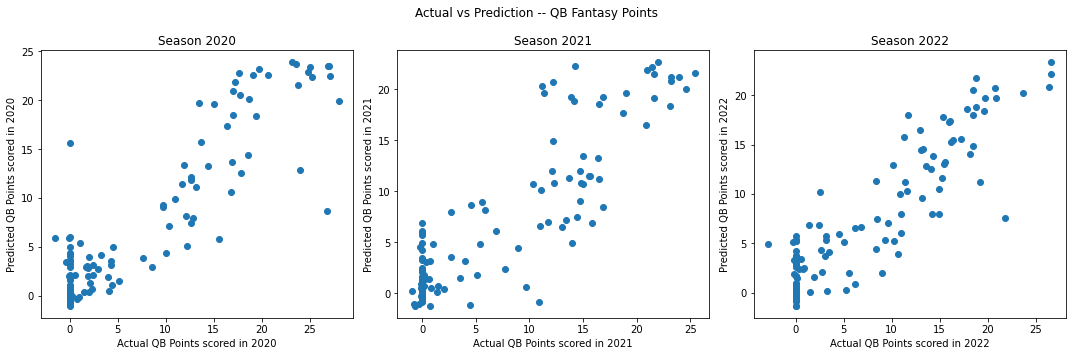

In [39]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- QB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(qb[f'te_prem_pts_pg_5ptd_{year}'], qb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual QB Points scored in {year}')
    ax.set_ylabel(f'Predicted QB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

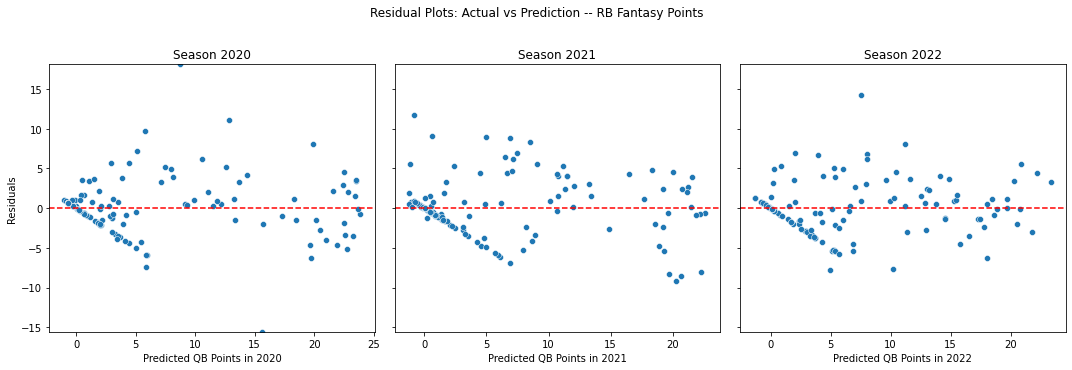

In [40]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = qb[f'te_prem_pts_pg_5ptd_{year}'] - qb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=qb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted QB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


This model is providing decent results so far, and it seems to get stronger as there is more year by year data. Let's try this same thing with RBs.

### RB Initial Modeling

In [41]:
rb.shape

(131, 425)

C:\Users\steph\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='te_prem_pts_p5td_2022'>

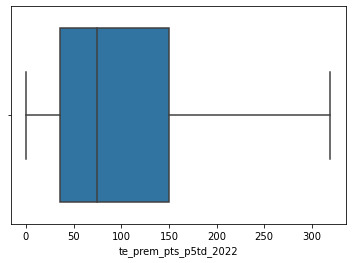

In [42]:
sns.boxplot(rb['te_prem_pts_p5td_2022'])

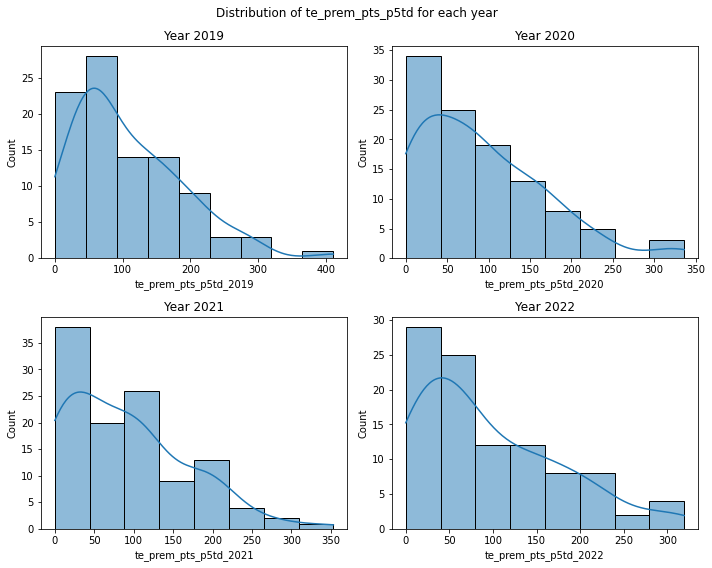

In [43]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Set the title for the entire plot
fig.suptitle('Distribution of te_prem_pts_p5td for each year')

# Iterate through each year and create the histogram in the corresponding subplot
years = [2019, 2020, 2021, 2022]
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.histplot(rb[f'te_prem_pts_p5td_{year}'], ax=axes[row, col], kde=True)
    axes[row, col].set_title(f'Year {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [65]:
y_pred_shuffled

array([13.35740221, -0.36656742, -0.36656742, 12.05619707,  2.16744823,
        9.36359619,  7.73796431,  2.62542094,  6.65487603,  2.15374431,
        8.11641726,  5.23245558,  6.2716057 ,  4.72675759, -0.2561364 ,
       12.34702165, -0.94150972,  0.75784309,  1.12587231,  8.44511706,
        6.20778195,  4.06533104,  0.62138592,  4.29359274, 10.51237792,
       12.25478801, 16.11216688, 21.3101825 ,  2.30198825,  4.81613648,
       11.07456489,  2.59935722, 14.13873662,  8.38081091, 15.24283819,
        4.30648797, -0.36656742,  9.01753927,  2.62542094,  9.25690398,
        6.36939625,  7.16162618,  2.98927191,  6.65487603, 20.04233098,
        4.60227793,  7.11273458, 16.10545722,  9.34980949, 11.02338662,
       21.04048884,  7.32920003, 12.88856018,  4.88515774,  1.2914175 ,
       12.42575549, 16.88515009,  2.88242423,  4.81613648,  8.02471191,
        1.72658178,  6.38258458, 19.56387222,  4.00985511, -0.36656742,
        2.62542094,  9.56946861, 17.43394392, 18.28442853,  3.66

In [44]:
# filling nulls similarly as before

# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    rb[[f'adp_{year}']] = rb[[f'adp_{year}']].replace(0, np.nan)

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

rb.loc[:, subset] = rb.loc[:, subset].fillna(0)

### RB Model

In [49]:
# using 'current' season features (like, age or experience, and adp)

# setting for reproducibility

np.random.seed(11)

# getting qb relevant stats
past_stats = ['ttl_opp', 'receivingyds', 'rush_pct_over_expected', 'te_prem_pts_pg_5ptd']

# a feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'rushy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = rb[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = rb[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = rb[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = rb[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        rb[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = rb[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        rb[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 9.216503092876417
R-squared: 0.716036675413559
--------------------
Metrics for 2021 season:
Mean Squared Error: 8.029848429465288
R-squared: 0.7233905693995257
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.5292189440223845
R-squared: 0.8688499955604673
--------------------


In [46]:
rb[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']]

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Aaron Jones,16.814286,15.613834,13.533333,14.416817,12.770588,14.316433
Adrian Peterson,7.406250,4.958373,6.150000,5.433818,0.000000,0.219248
Alex Collins,6.866667,5.262667,5.845455,3.893867,0.000000,0.132054
Alexander Mattison,6.184615,6.362848,6.868750,9.515612,4.758824,5.812316
Alvin Kamara,22.420000,18.099533,16.246154,15.417504,12.213333,12.047746
Ameer Abdullah,1.625000,3.872952,4.147059,5.854273,2.447059,0.956053
Antonio Gibson,13.157143,6.651643,12.881250,14.794400,9.526667,9.166009
Austin Ekeler,13.830000,11.268765,19.050000,14.068095,18.776471,11.601446
Benny Snell,0.000000,4.452150,0.000000,0.130004,0.000000,1.348937


In [79]:
rb[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Joe Mixon,14.964286,15.660361
Derrick Henry,17.953750,14.802740
Christian McCaffrey,18.521176,14.483323
Saquon Barkley,15.843750,14.441058
Aaron Jones,12.770588,13.977955
Tony Pollard,14.331250,13.303322
Nick Chubb,15.641176,13.236442
James Conner,13.630769,13.212117
Dalvin Cook,12.841176,13.202585


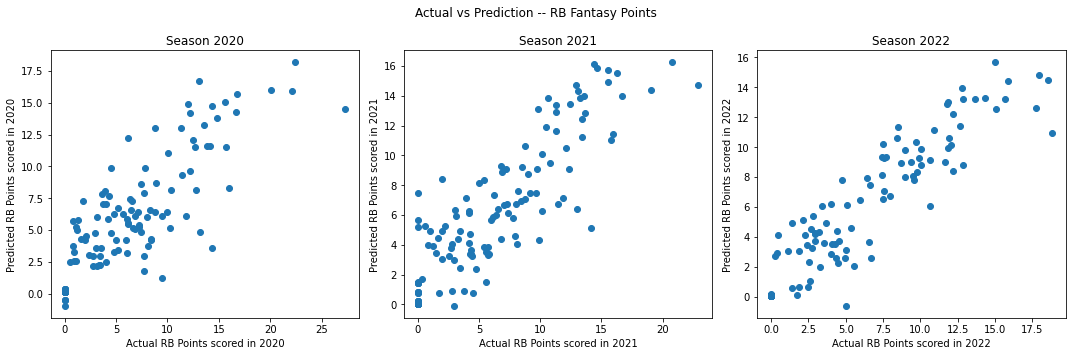

In [80]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- RB Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(rb[f'te_prem_pts_pg_5ptd_{year}'], rb[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual RB Points scored in {year}')
    ax.set_ylabel(f'Predicted RB Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()




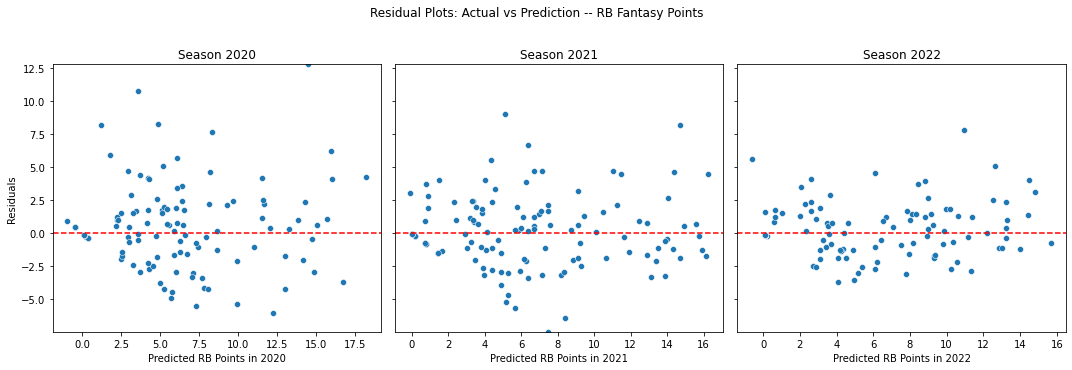

In [81]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- RB Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = rb[f'te_prem_pts_pg_5ptd_{year}'] - rb[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=rb[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted RB Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In [82]:

# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
5        5   12.541923
6        6    5.372691
3        3    2.415364
7        7    1.443239
2        2    0.929021
0        0    0.831513
1        1    0.291184
4        4    0.037212


In [47]:
# PREDICTIONS FOR 2023

rb[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False)

,fantasypoints_pg_2023,adp_2023
player_name,,
Austin Ekeler,14.735061,2
Tony Pollard,14.698259,15
Joe Mixon,14.661401,23
Aaron Jones,14.156690,31
Saquon Barkley,14.004185,5
Christian McCaffrey,13.898232,1
Josh Jacobs,13.692476,11
Nick Chubb,13.492610,10
Derrick Henry,13.478299,9


These too seem to be getting better as the model sees more seasons.

# WR

In [83]:
wr.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,avg_cushion_2019,avg_cushion_2020,avg_cushion_2021,avg_cushion_2022,avg_expected_yac_2019,avg_expected_yac_2020,avg_expected_yac_2021,avg_expected_yac_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_separation_2019,avg_separation_2020,avg_separation_2021,avg_separation_2022,avg_yac_2019,avg_yac_2020,avg_yac_2021,avg_yac_2022,avg_yac_above_expectation_2019,avg_yac_above_expectation_2020,avg_yac_above_expectation_2021,avg_yac_above_expectation_2022,catch_percentage_2019,catch_percentage_2020,catch_percentage_2021,catch_percentage_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,losses_2019,losses_2020,losses_2021,losses_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_2019,pct_gs_2020,pct_gs_2021,pct_gs_2022,percent_share_of_intended_air_yards_2019,percent_share_of_intended_air_yards_2020,percent_share_of_intended_air_yards_2021,percent_share_of_intended_air_yards_2022,ppr_2019,ppr_2020,ppr_2021,ppr_2022,pts_allowed_2019,pts_allowed_2020,pts_allowed_2021,pts_allowed_2022,pts_scored_2019,pts_scored_2020,pts_scored_2021,pts_scored_2022,pts_scored_last_yr_tm_stat_2019,pts_scored_last_yr_tm_stat_2020,pts_scored_last_yr_tm_stat_2021,pts_scored_last_yr_tm_stat_2022,rec_2019,rec_2020,rec_2021,rec_2022,receivingtd_2019,receivingtd_2020,receivingtd_2021,receivingtd_2022,receivingyds_2019,receivingyds_2020,receivingyds_2021,receivingyds_2022,rookie_2019,rookie_2020,rookie_2021,rookie_2022,rushingatt_2019,rushingatt_2020,rushingatt_2021,rushingatt_2022,rushingtd_2019,rushingtd_2020,rushingtd_2021,rushingtd_2022,rushingyds_2019,rushingyds_2020,rushingyds_2021,rushingyds_2022,rushy_2019,rushy_2020,rushy_2021,rushy_2022,rushy_last_yr_tm_stat_2019,rushy_last_yr_tm_stat_2020,rushy_last_yr_tm_stat_2021,rushy_last_yr_tm_stat_2022,rushyds_allowed_2019,rushyds_allowed_2020,rushyds_allowed_2021,rushyds_allowed_2022,scrimyds_2019,scrimyds_2020,scrimyds_2021,scrimyds_2022,season_position_rank_2019,season_position_rank_2020,season_

In [84]:
# wr ADPs 

wr['adp_2020'].head(10)

player_name
A.J. Brown         46.0
A.J. Green         73.0
Adam Humphries      NaN
Adam Thielen       31.0
Albert Wilson       NaN
Alec Pierce         NaN
Alex Erickson       NaN
Allen Hurns         NaN
Allen Lazard      132.0
Allen Robinson     34.0
Name: adp_2020, dtype: float64

In [50]:
# replacing 0's in scoring data with nan's 

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

wr.loc[:, subset] = wr.loc[:, subset].fillna(0)

In [51]:
# using 'current' season features (like, age or experience, and adp)

# getting wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards', 'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = wr[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = wr[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = wr[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = wr[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        wr[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = wr[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        wr[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 4.684666532047869
R-squared: 0.7997819858992857
--------------------
Metrics for 2021 season:
Mean Squared Error: 5.077546511743867
R-squared: 0.7584531346942602
--------------------
Metrics for 2022 season:
Mean Squared Error: 3.6291639000837805
R-squared: 0.8311779259681082
--------------------


In [52]:
wr[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(10)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Larry Fitzgerald,5.684615,5.416117,0.000000,0.161093,0.000000,-0.008151
Tim Patrick,9.046667,5.543268,8.118750,5.786880,0.000000,2.222814
Devin Duvernay,2.318750,2.504769,3.793750,2.139326,6.542857,7.178203
Ray-Ray McCloud,1.387500,3.154327,2.918750,3.725130,3.005882,1.687452
T.Y. Hilton,8.946667,10.927086,6.260000,4.606239,5.200000,2.805632
Quez Watkins,3.350000,3.043510,5.441176,4.669450,4.000000,4.154366
Dede Westbrook,-0.550000,4.343863,0.786667,1.790755,0.000000,1.178166
Chris Conley,5.140000,1.907300,3.350000,0.763139,0.733333,1.726078
Sterling Shepard,10.625000,10.281168,8.528571,3.383598,9.300000,4.093438


In [53]:
# how did it doo last year in prdicting ppg?

wr[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sort_values('fantasypoints_pg_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,
Justin Jefferson,17.803529,15.994125
Cooper Kupp,18.211111,15.398673
Stefon Diggs,16.412500,15.317352
CeeDee Lamb,14.594118,14.676855
Ja'Marr Chase,16.575000,14.646071
Tyreek Hill,16.570588,14.601745
Davante Adams,16.794118,14.492093
Tee Higgins,11.368750,14.002904
Mike Evans,12.460000,13.869107


In [54]:
# PREDICTIONS FOR 2023

wr[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False)

,fantasypoints_pg_2023,adp_2023
player_name,,
Justin Jefferson,15.994125,3
Stefon Diggs,15.291462,14
Amon-Ra St. Brown,15.010579,25
CeeDee Lamb,14.959007,17
Tyreek Hill,14.926422,13
Tee Higgins,14.883286,28
Ja'Marr Chase,14.862786,4
Cooper Kupp,14.693261,12
A.J. Brown,14.262765,16


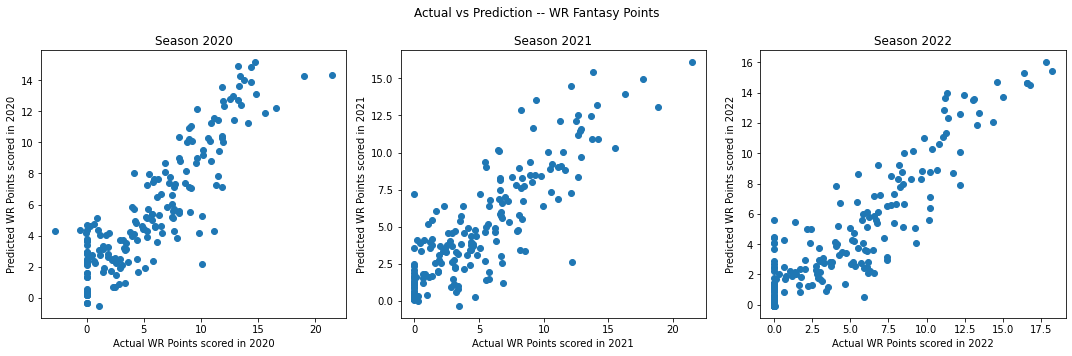

In [55]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- WR Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(wr[f'te_prem_pts_pg_5ptd_{year}'], wr[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual WR Points scored in {year}')
    ax.set_ylabel(f'Predicted WR Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

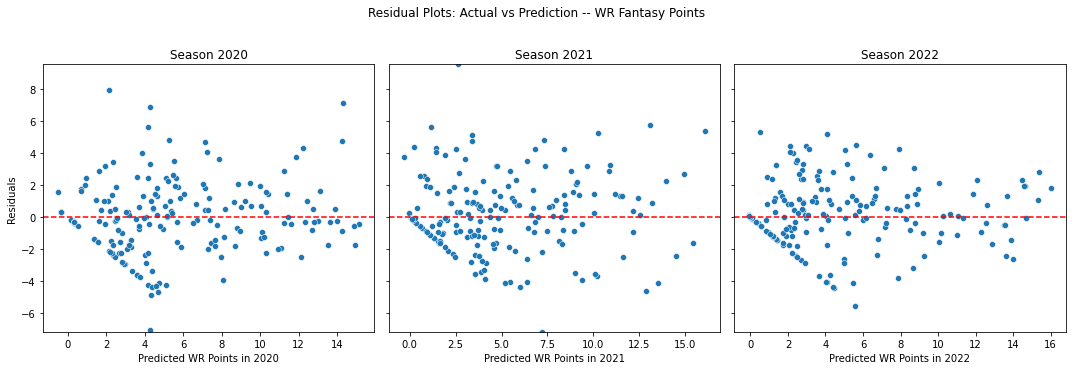

In [56]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- WR Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = wr[f'te_prem_pts_pg_5ptd_{year}'] - wr[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=wr[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted WR Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [57]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
7        7    8.102630
5        5    3.633256
8        8    2.629430
0        0    1.753118
6        6    1.238480
3        3    0.298416
2        2   -0.019016
9        9   -0.043382
1        1   -0.239944
4        4   -0.452272


## TE

In [58]:
# lets replace those 0s with nulls

season = ['2019', '2020', '2021', '2022']

for i in range(len(season)):
    year = season[i]
    te[[f'adp_{year}']] = te[[f'adp_{year}']].replace(0, np.nan)

te['adp_2020'].head()

player_name
Adam Shaheen            NaN
Adam Trautman           NaN
Albert Okwuegbunam      NaN
Anthony Firkser         NaN
Austin Hooper         136.0
Name: adp_2020, dtype: float64

In [59]:
# replacing 0's in scoring data with nan's 

subset = ['te_prem_pts_pg_5ptd_2019', 'te_prem_pts_pg_5ptd_2020','te_prem_pts_pg_5ptd_2021',
                             'te_prem_pts_pg_5ptd_2022', 'te_prem_pts_p5td_2019', 'te_prem_pts_p5td_2020' ,
                             'te_prem_pts_p5td_2021', 'te_prem_pts_p5td_2022']

te.loc[:, subset] = te.loc[:, subset].fillna(0)

In [60]:
# using 'current' season features (like, age or experience, and adp)

# let's trry with the same wr relevant stats
past_stats = ['ttl_opp', 'percent_share_of_intended_air_yards',
              'avg_yac', 'yds_per_opp', 'catch_percentage', 'te_prem_pts_pg_5ptd']

# another feature i'd love to include, or at least explore, is current team's offense ranking last year, as well as avg time to throw
# for that respective OL

current_stats = ['age', 'adp', 'passy_last_yr_tm_stat', 'pts_scored_last_yr_tm_stat']


target_seasons = ['2020', '2021', '2022', '2023']

for i in range(len(target_seasons)):
    current_season = target_seasons[i]
    previous_season = str(int(current_season) - 1)
    y = 'te_prem_pts_pg_5ptd'
    
    X_train_p = te[[f'{stat}_{previous_season}' for stat in past_stats]]
    X_train_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
    
    X_train = pd.concat([X_train_p, X_train_c], axis = 1, ignore_index = True)
    
    if current_season != '2023':
        y_train = te[[f'te_prem_pts_pg_5ptd_{current_season}']].values.ravel()
        # Step 2: Train the Regression Models
        # Choose the regression model you want to use
        model = HistGradientBoostingRegressor()
        model.fit(X_train, y_train)
        
        # Step 3: Make Predictions
        X_test_p = te[[f'{stat}_{current_season}' for stat in past_stats]]
        X_test_c = te[[f'{stat}_{current_season}' for stat in current_stats]]
        X_test = pd.concat([X_test_p, X_test_c], axis = 1, ignore_index = True)
    
 
        y_pred = model.predict(X_test)
        # Step 4: Combine Predictions
        te[f'fantasypoints_pg_{current_season}'] = y_pred
        # evaluating the models
        
        y_test = te[f'te_prem_pts_pg_5ptd_{current_season}'].values.ravel()
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Metrics for {current_season} season:")
        print(f"Mean Squared Error: {mse}")
        print(f"R-squared: {r2}")
        print("--------------------")
        
    else:
        predictions_23 = model.predict(X_train)
        te[f'fantasypoints_pg_{current_season}'] = predictions_23
    

Metrics for 2020 season:
Mean Squared Error: 5.342157765984889
R-squared: 0.7073914271272828
--------------------
Metrics for 2021 season:
Mean Squared Error: 2.1774684981167547
R-squared: 0.870884183618823
--------------------
Metrics for 2022 season:
Mean Squared Error: 2.9796741868566565
R-squared: 0.8036750072467689
--------------------


In [61]:
te[['te_prem_pts_pg_5ptd_2020', 'fantasypoints_pg_2020', 'te_prem_pts_pg_5ptd_2021',
            'fantasypoints_pg_2021', 'te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022']].sample(20)

,te_prem_pts_pg_5ptd_2020,fantasypoints_pg_2020,te_prem_pts_pg_5ptd_2021,fantasypoints_pg_2021,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022
player_name,,,,,,
Jelani Woods,0.000000,0.296395,0.000000,0.672503,4.946667,8.474242
Matt LaCosse,0.000000,5.131065,0.000000,-0.003496,0.000000,0.310340
Jordan Reed,7.310000,4.015171,0.000000,-0.159905,0.000000,0.012846
Mo Alie-Cox,5.360000,7.403551,4.682353,5.641889,3.170588,2.394998
Noah Gray,0.000000,0.296395,1.037500,2.029303,4.117647,3.419936
Jared Cook,8.493333,10.448586,8.025000,8.752783,0.000000,0.012846
Chigoziem Okonkwo,0.000000,0.296395,0.000000,0.672503,5.600000,4.323898
Marcedes Lewis,2.580000,4.819329,2.611765,3.187750,1.447059,1.113588
Shane Zylstra,0.000000,0.258365,1.600000,1.757325,3.153846,4.032046


In [63]:
te[['te_prem_pts_pg_5ptd_2022', 'fantasypoints_pg_2022', 'adp_2022']].sort_values('te_prem_pts_pg_5ptd_2022', ascending = False)

,te_prem_pts_pg_5ptd_2022,fantasypoints_pg_2022,adp_2022
player_name,,,
Travis Kelce,18.488235,12.417827,17.0
George Kittle,13.366667,11.209161,45.0
Mark Andrews,12.566667,9.154511,23.0
T.J. Hockenson,12.435294,11.347268,72.0
Dallas Goedert,11.766667,9.912843,78.0
Zach Ertz,11.160000,10.785580,90.0
Evan Engram,10.288235,9.859354,NaN
David Njoku,10.142857,7.919197,NaN
Dalton Schultz,9.513333,9.860733,62.0


In [64]:
te[['fantasypoints_pg_2023', 'adp_2023']].sort_values('fantasypoints_pg_2023', ascending = False)

,fantasypoints_pg_2023,adp_2023
player_name,,
Travis Kelce,12.417827,8
T.J. Hockenson,11.347268,40
Evan Engram,10.864839,104
Dawson Knox,10.573214,118
George Kittle,10.035271,49
Dallas Goedert,9.664994,67
Cole Kmet,8.912475,124
Dalton Schultz,8.834164,95
Mark Andrews,8.735027,30


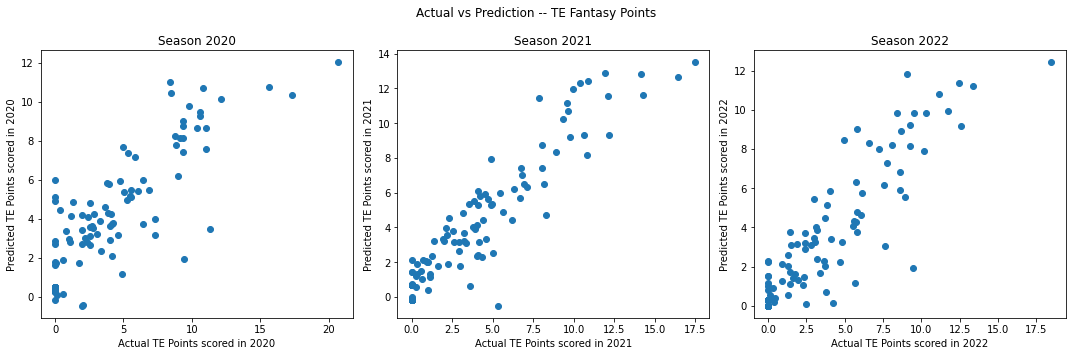

In [65]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Set the title for the entire plot
fig.suptitle('Actual vs Prediction -- TE Fantasy Points')

# Iterate through each season from 2020 to 2022
for i, year in enumerate(range(2020, 2023)):
    ax = axes[i]
    ax.scatter(te[f'te_prem_pts_pg_5ptd_{year}'], te[f'fantasypoints_pg_{year}'])
    ax.set_xlabel(f'Actual TE Points scored in {year}')
    ax.set_ylabel(f'Predicted TE Points scored in {year}')
    ax.set_title(f'Season {year}')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

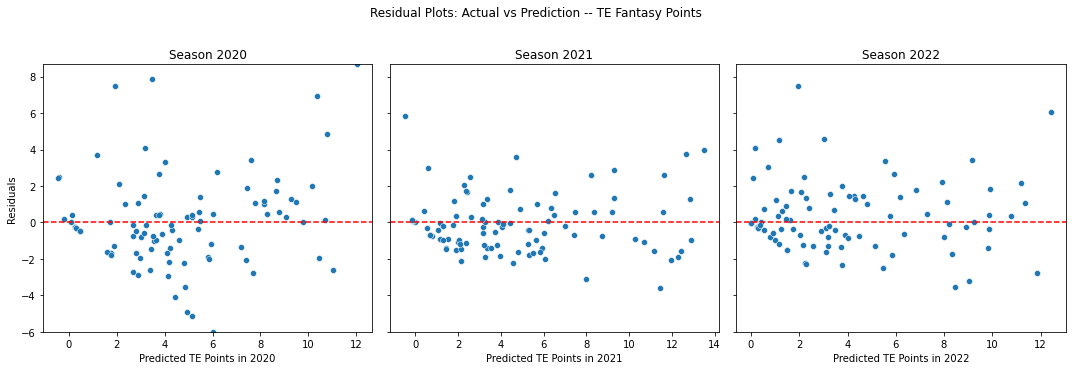

In [66]:
## residual plot

# Calculate the common y-axis limits based on the maximum and minimum residuals across all three seasons
all_residuals = []
for year in range(2020, 2023):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    all_residuals.extend(residuals)

y_min, y_max = min(all_residuals), max(all_residuals)

# Create three separate plots for each season from 2020 to 2022
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Set the title for the entire plot
fig.suptitle('Residual Plots: Actual vs Prediction -- TE Fantasy Points', y=1.02)

for i, year in enumerate(range(2020, 2023)):
    residuals = te[f'te_prem_pts_pg_5ptd_{year}'] - te[f'fantasypoints_pg_{year}']
    ax = axes[i]
    sns.scatterplot(x=te[f'fantasypoints_pg_{year}'], y=residuals, ax=ax)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_xlabel(f'Predicted TE Points in {year}')
    ax.set_ylabel('Residuals')
    ax.set_title(f'Season {year}')

    # Set the y-axis limits to be the same for all plots
    ax.set_ylim(y_min, y_max)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


In [67]:
# getting feature importance for final model used here


feature_importance = []
for col in X_test.columns:
    X_test_shuffled = X_test.copy()
    X_test_shuffled[col] = X_test_shuffled[col].sample(frac=1, random_state=42).values
    y_pred_shuffled = model.predict(X_test_shuffled)
    shuffled_mse = mean_squared_error(y_test, y_pred_shuffled)
    importance_score = shuffled_mse - mse
    feature_importance.append(importance_score)

# Step 4: Create a DataFrame to display the feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Step 5: Sort the DataFrame by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 6: Print or visualize the feature importance scores
print(feature_importance_df)

   Feature  Importance
0        0    7.316529
9        9    3.163178
1        1    1.096025
8        8    0.742546
4        4    0.614445
6        6    0.609322
5        5    0.576836
3        3    0.151763
2        2    0.057732
7        7    0.000000


In [115]:
pd.set_option('display.max_columns', None)

rb.fillna(0, inplace = True)

rb.head()

,1std_2019,1std_2020,1std_2021,1std_2022,adp_2019,adp_2020,adp_2021,adp_2022,age_2019,age_2020,age_2021,age_2022,aggressiveness_2019,aggressiveness_2020,aggressiveness_2021,aggressiveness_2022,attempts_2019,attempts_2020,attempts_2021,attempts_2022,avg_air_distance_2019,avg_air_distance_2020,avg_air_distance_2021,avg_air_distance_2022,avg_air_yards_differential_2019,avg_air_yards_differential_2020,avg_air_yards_differential_2021,avg_air_yards_differential_2022,avg_air_yards_to_sticks_2019,avg_air_yards_to_sticks_2020,avg_air_yards_to_sticks_2021,avg_air_yards_to_sticks_2022,avg_completed_air_yards_2019,avg_completed_air_yards_2020,avg_completed_air_yards_2021,avg_completed_air_yards_2022,avg_intended_air_yards_2019,avg_intended_air_yards_2020,avg_intended_air_yards_2021,avg_intended_air_yards_2022,avg_per_catch_2019,avg_per_catch_2020,avg_per_catch_2021,avg_per_catch_2022,avg_per_rush_2019,avg_per_rush_2020,avg_per_rush_2021,avg_per_rush_2022,avg_per_tgt_2019,avg_per_tgt_2020,avg_per_tgt_2021,avg_per_tgt_2022,avg_time_to_los_2019,avg_time_to_los_2020,avg_time_to_los_2021,avg_time_to_los_2022,avg_time_to_throw_2019,avg_time_to_throw_2020,avg_time_to_throw_2021,avg_time_to_throw_2022,cmp_2019,cmp_2020,cmp_2021,cmp_2022,completion_percentage_above_expectation_2019,completion_percentage_above_expectation_2020,completion_percentage_above_expectation_2021,completion_percentage_above_expectation_2022,defense_2019,defense_2020,defense_2021,defense_2022,dkpt_2019,dkpt_2020,dkpt_2021,dkpt_2022,efficiency_2019,efficiency_2020,efficiency_2021,efficiency_2022,expected_completion_percentage_2019,expected_completion_percentage_2020,expected_completion_percentage_2021,expected_completion_percentage_2022,expected_rush_yards_2019,expected_rush_yards_2020,expected_rush_yards_2021,expected_rush_yards_2022,fantasypoints_2019,fantasypoints_2020,fantasypoints_2021,fantasypoints_2022,fdpt_2019,fdpt_2020,fdpt_2021,fdpt_2022,fp_per_gm_2019,fp_per_gm_2020,fp_per_gm_2021,fp_per_gm_2022,fp_per_opp_2019,fp_per_opp_2020,fp_per_opp_2021,fp_per_opp_2022,fumbles_2019,fumbles_2020,fumbles_2021,fumbles_2022,fumbleslost_2019,fumbleslost_2020,fumbleslost_2021,fumbleslost_2022,g_2019,g_2020,g_2021,g_2022,games_out_2019,games_out_2020,games_out_2021,games_out_2022,games_out_or_questionable_2019,games_out_or_questionable_2020,games_out_or_questionable_2021,games_out_or_questionable_2022,games_questionable_2019,games_questionable_2020,games_questionable_2021,games_questionable_2022,gs_2019,gs_2020,gs_2021,gs_2022,height_2019,height_2020,height_2021,height_2022,hppr_fp_2019,hppr_fp_2020,hppr_fp_2021,hppr_fp_2022,hppr_fp_5ptd_2019,hppr_fp_5ptd_2020,hppr_fp_5ptd_2021,hppr_fp_5ptd_2022,hppr_pts_pg_5ptd_2019,hppr_pts_pg_5ptd_2020,hppr_pts_pg_5ptd_2021,hppr_pts_pg_5ptd_2022,int_2019,int_2020,int_2021,int_2022,interceptions_2019,interceptions_2020,interceptions_2021,interceptions_2022,losses_2019,losses_2020,losses_2021,losses_2022,max_air_distance_2019,max_air_distance_2020,max_air_distance_2021,max_air_distance_2022,max_completed_air_distance_2019,max_completed_air_distance_2020,max_completed_air_distance_2021,max_completed_air_distance_2022,next_season_2019,next_season_2020,next_season_2021,next_season_2022,non_pass_tds_2019,non_pass_tds_2020,non_pass_tds_2021,non_pass_tds_2022,offense_2019,offense_2020,offense_2021,offense_2022,pass_touchdowns_2019,pass_touchdowns_2020,pass_touchdowns_2021,pass_touchdowns_2022,pass_yards_2019,pass_yards_2020,pass_yards_2021,pass_yards_2022,passer_rating_2019,passer_rating_2020,passer_rating_2021,passer_rating_2022,passingatt_2019,passingatt_2020,passingatt_2021,passingatt_2022,passingtd_2019,passingtd_2020,passingtd_2021,passingtd_2022,passingyds_2019,passingyds_2020,passingyds_2021,passingyds_2022,passy_2019,passy_2020,passy_2021,passy_2022,passy_last_yr_tm_stat_2019,passy_last_yr_tm_stat_2020,passy_last_yr_tm_stat_2021,passy_last_yr_tm_stat_2022,passyds_allowed_2019,passyds_allowed_2020,passyds_allowed_2021,passyds_allowed_2022,pct_gs_

For some initial modeling, let's use FantasyPoints of prev. 2 seasons; total opps prev. 2 seasons; fp_per_game; years_exp

In [105]:
rb_small = rb[['player_id_x', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'avg_per_rush20', 
               'avg_per_catch20', 'fp_per_gm21hppr']]

rb_X = rb_small.set_index('player_id')

rb_target = rb_small['fp_per_gm21hppr']


KeyError: "None of [Index(['player_id_x', 'fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21',\n       'ttl_opp20', 'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],\n      dtype='object')] are in the [columns]"

In [234]:
rb_target = rb_target.fillna(0)

In [235]:
rb_X = rb_X.fillna(0)

rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


In [236]:
rb_X.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000


In [237]:
# splitting into train and test

rb_x_train, rb_x_test, rb_y_train, rb_y_test = train_test_split(rb_X, rb_target, test_size = .25, random_state = 0)



Decision trees don't need much pre-processing, so let's try modeling with one first

In [238]:
# decision tree regressor

dt_reg = tree.DecisionTreeRegressor(random_state = 0)

dt_reg = dt_reg.fit(rb_x_train, rb_y_train)


In [239]:
dt_pred_train = dt_reg.predict(rb_x_train)
dt_pred_test = dt_reg.predict(rb_x_test)

dt_pred_test

array([ 2.        ,  5.35714286,  2.        , 11.32142857,  6.        ,
        3.        ,  5.86363636,  6.875     ,  6.82142857,  2.26923077,
        8.66666667, 10.14705882,  3.75      , 20.76470588,  2.91666667,
        6.        , 10.14705882,  0.28571429, 12.375     , 10.14705882,
       13.69230769,  0.80769231,  2.91666667,  5.78125   ,  4.41666667,
        3.47058824,  5.        , 13.53333333, 12.375     ,  0.75      ,
        0.875     ,  0.80769231,  2.22222222])

In [240]:
values = ['Decision Tree', np.sqrt(mean_squared_error(rb_y_train, dt_pred_train)),
         np.sqrt(mean_squared_error(rb_y_test, dt_pred_test))]

values = pd.DataFrame([values], columns = ['Model Type', 'Train Error', 'Test Error'])

values

,Model Type,Train Error,Test Error
0,Decision Tree,0.0,0.465304


In [241]:
# Visualizing DT
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere

import graphviz

dot_tree = tree.export_graphviz(dt_reg, out_file ='tree.dot')

In [242]:
graph = graphviz.Source(dot_tree)

In [243]:
# graph

### Pre-Processing for other modeling

In [244]:
rb_trans.corr()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
fp_per_gm19hppr,1.000000,0.648698,0.329865,0.530452,0.265139,0.155047,0.600250,0.956624,0.606831,0.390601,0.521965,0.590013
fp_per_gm20hppr,0.648698,1.000000,0.026779,0.866037,0.488214,0.311668,0.759553,0.558539,0.959658,0.043812,0.851055,0.722386
years_exp_21,0.329865,0.026779,1.000000,0.050259,-0.085290,-0.051345,0.021461,0.392850,0.056403,0.968649,0.082918,0.064608
ttl_opp20,0.530452,0.866037,0.050259,1.000000,0.463566,0.240742,0.728317,0.502173,0.874711,0.052351,0.962985,0.704128
avg_per_rush20,0.265139,0.488214,-0.085290,0.463566,1.000000,0.348063,0.393512,0.290250,0.568873,-0.076044,0.531948,0.436311
avg_per_catch20,0.155047,0.311668,-0.051345,0.240742,0.348063,1.000000,0.168934,0.148382,0.370003,-0.070054,0.293942,0.187776
fp_per_gm21hppr,0.600250,0.759553,0.021461,0.728317,0.393512,0.168934,1.000000,0.533245,0.729905,0.044177,0.701455,0.969194
fpg19_trans,0.956624,0.558539,0.392850,0.502173,0.290250,0.148382,0.533245,1.000000,0.559611,0.455172,0.517643,0.553370
fpg20_trans,0.606831,0.959658,0.056403,0.874711,0.568873,0.370003,0.729905,0.559611,1.000000,0.060276,0.911293,0.728101
ye21_trans,0.390601,0.043812,0.968649,0.052351,-0.076044,-0.070054,0.044177,0.455172,0.060276,1.000000,0.078007,0.077190


In [245]:
rb_X.describe()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,6.233781,5.943615,3.751938,95.643411,3.592165,6.487472,5.991770
std,7.066929,5.699271,2.304991,95.060080,1.644691,3.670383,5.163123
min,-1.000000,0.000000,1.000000,0.000000,-1.000000,-3.000000,-0.166667
25%,0.000000,1.000000,2.000000,13.000000,3.176471,5.000000,1.772727
50%,3.693333,4.545455,3.000000,69.000000,4.148515,6.800000,4.437500
75%,10.762500,8.769231,5.000000,159.000000,4.570175,8.305556,9.566667
max,32.950000,27.166667,14.000000,409.000000,6.500000,27.000000,23.000000


In [246]:
# if i need to take out negatives
# rb_X = rb_X[(rb_X[rb_X.columns] >= 0).all(axis = 1)]

In [247]:
rb_X

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
player_id,,,,,,,
00-0032187,12.269231,13.625000,6,193.0,4.700680,9.515152,5.000000
00-0033118,16.942857,11.966667,5,270.0,3.995816,5.480000,7.333333
00-0034681,6.830769,8.843750,3,164.0,4.618557,7.584906,10.125000
00-0030465,0.865714,0.000000,8,1.0,0.000000,0.000000,0.000000
00-0031285,16.221429,6.500000,7,64.0,3.185185,8.285714,8.125000
...,...,...,...,...,...,...,...
00-0035806,0.000000,3.437500,1,47.0,3.794872,4.714286,3.500000
00-0036450,0.000000,2.050000,1,36.0,4.192308,6.800000,2.916667
00-0033925,0.000000,2.750000,4,23.0,4.318182,5.000000,9.944444


<AxesSubplot:>

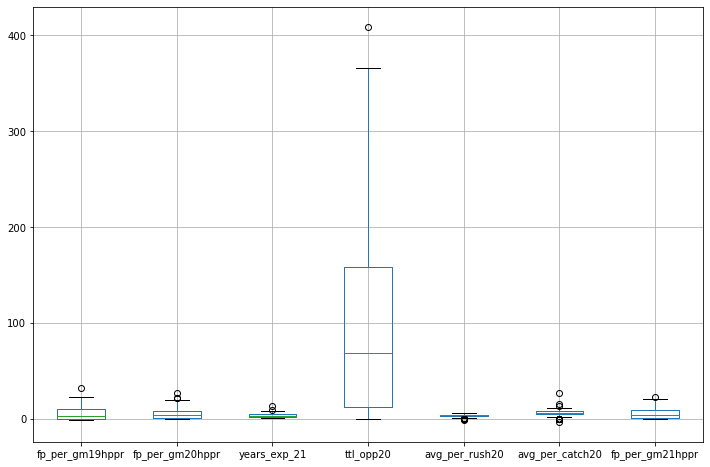

In [248]:
plt.figure(figsize = (12,8))
rb_X.boxplot()

In [249]:
# fp_gm19_box = stats.boxcox(rb_X['fp_per_gm19hppr'])

In [250]:
sc = StandardScaler()

rb_trans = sc.fit_transform(rb_X)

rb_trans = pd.DataFrame(rb_trans, columns = rb_X.columns)

rb_trans.head()

,fp_per_gm19hppr,fp_per_gm20hppr,years_exp_21,ttl_opp20,avg_per_rush20,avg_per_catch20,fp_per_gm21hppr
0,0.857371,1.353038,0.979104,1.028151,0.676624,0.828111,-0.192836
1,1.521287,1.060931,0.543572,1.841323,0.246383,-0.275557,0.260849
2,0.084806,0.510845,-0.327493,0.721892,0.626496,0.300163,0.803650
3,-0.762565,-1.046939,1.850169,-0.999498,-2.192612,-1.774410,-1.165018
4,1.418804,0.098004,1.414637,-0.334176,-0.248416,0.491843,0.414777


<AxesSubplot:>

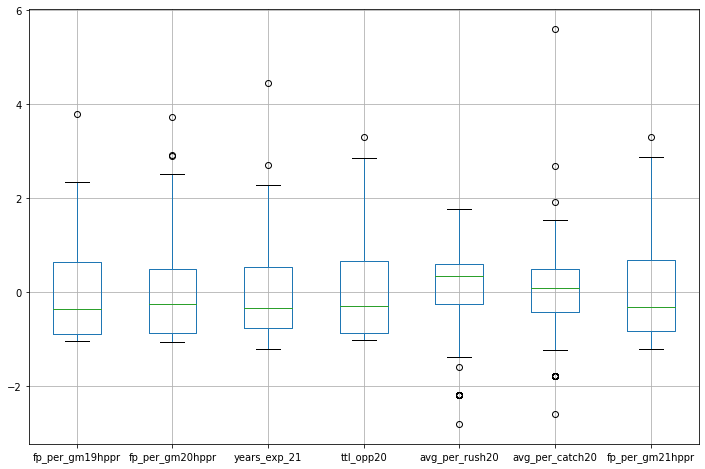

In [251]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [252]:
rb_trans.columns

Index(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20',
       'avg_per_rush20', 'avg_per_catch20', 'fp_per_gm21hppr'],
      dtype='object')

fp_per_gm, ttl_opp,and years_exp all have right skewed distributions, exponential like.

avg_per_rush has a left skewed distribution. Avg per catch is about normal.

In [253]:
fpg19_trans = stats.yeojohnson(rb_trans['fp_per_gm19hppr'])
fpg20_trans = stats.yeojohnson(rb_trans['fp_per_gm20hppr'])
ye21_trans = stats.yeojohnson(rb_trans['years_exp_21'])
to20_trans = stats.yeojohnson(rb_trans['ttl_opp20'])
fpg21_trans = stats.yeojohnson(rb_trans['fp_per_gm21hppr'])



In [254]:
rb_trans_unskewed = pd.DataFrame([pd.Series(fpg19_trans), pd.Series(fpg20_trans), pd.Series(ye21_trans), 
                                  pd.Series(to20_trans), pd.Series(fpg21_trans)],
                                 columns = ['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'])

In [256]:
rb_trans['fpg19_trans'] = pd.Series(fpg19_trans[0])
rb_trans['fpg20_trans'] = pd.Series(fpg20_trans[0])
rb_trans['ye21_trans'] = pd.Series(ye21_trans[0])
rb_trans['to20_trans'] = pd.Series(to20_trans[0])
rb_trans['fpg21_trans'] = pd.Series(fpg21_trans[0])

<AxesSubplot:>

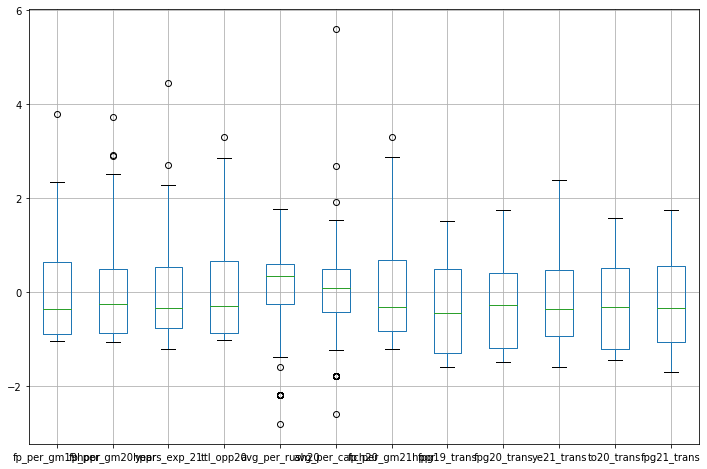

In [257]:
plt.figure(figsize = (12,8))
rb_trans.boxplot()

In [258]:
rb_pp = rb_trans.drop(['fp_per_gm19hppr', 'fp_per_gm20hppr', 'years_exp_21', 'ttl_opp20', 'fp_per_gm21hppr'], axis = 1)

In [259]:
rb_pp


,avg_per_rush20,avg_per_catch20,fpg19_trans,fpg20_trans,ye21_trans,to20_trans,fpg21_trans
0,0.676624,0.828111,0.612516,0.915854,0.779829,0.736543,-0.206703
1,0.246383,-0.275557,0.909995,0.765811,0.472132,1.109273,0.238437
2,0.626496,0.300163,0.081285,0.426331,-0.359406,0.560688,0.634175
3,-2.192612,-1.774410,-1.065761,-1.489014,1.287651,-1.428294,-1.642071
4,-0.248416,0.491843,0.869789,0.094184,1.047986,-0.383040,0.362020
...,...,...,...,...,...,...,...
124,0.123730,-0.484990,-1.294843,-0.521884,-1.593260,-0.628526,-0.570283
125,0.366319,0.085480,-1.294843,-0.878089,-1.593260,-0.801898,-0.727639
126,0.443151,-0.406844,-1.294843,-0.692514,0.104627,-1.021354,0.611544
127,0.161739,1.918020,-1.294843,-0.629125,-1.593260,-1.109932,-0.704624


In [260]:
rb_pp_X = rb_pp.drop(['fpg21_trans'], axis = 1)
rb_pp_y = rb_pp['fpg21_trans']

rb_pp_x_train, rb_pp_x_test, rb_pp_y_train, rb_pp_y_test = train_test_split(rb_pp_X, rb_pp_y, test_size = .25, random_state = 0)

### LINEAR REGRESSION

In [261]:
lin_reg = LinearRegression()

lin_reg.fit(rb_pp_x_train, rb_pp_y_train)

LinearRegression()

In [262]:
lr_pred_test = lin_reg.predict(rb_pp_x_test)
lr_pred_train = lin_reg.predict(rb_pp_x_train)

lr_pred_test

array([ 0.04565147, -0.8995001 , -1.35935225,  0.78911808, -1.1617012 ,
       -0.57737567, -1.16954314, -0.09259256,  0.37836419, -1.09555592,
        0.57769406,  0.45380238, -0.64683291,  1.24896293,  0.19760374,
       -0.26181442,  0.33881409,  0.10094705,  0.0896751 ,  0.14422218,
        0.94817751, -1.23167503, -0.01183887,  0.30318729, -0.68287698,
       -0.64625817, -1.16176251,  0.9149031 , -0.77770382, -0.42332721,
       -1.20907459, -1.2477523 , -1.26902687])

# we may have to transform transformed errors back into normal

### See note below on how to possibly do this

It sounds like you effectively want the geometric standard error, akin to the geometric mean exp(mean(log(x))).

While it might seem reasonable to compute that as:

exp(sd(log(x)/sqrt(n-1)))

You and others have already pointed out that that isn't correct for a few reasons. Instead, use:

exp(mean(log(x))) * (sd(log(x))/sqrt(n-1))


In [263]:
values_lr = ['Logistic Regression', np.sqrt(mean_squared_error(rb_pp_y_train, lr_pred_train)),
         np.sqrt(mean_squared_error(rb_pp_y_test, lr_pred_test))]

values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)

C:\Users\steph\AppData\Local\Temp/ipykernel_34584/2792587993.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  values = values.append(pd.Series(values_lr, index = ['Model Type', 'Train Error', 'Test Error']), ignore_index = True)


In [264]:
values

,Model Type,Train Error,Test Error
0,Decision Tree,0.000000,0.465304
1,Logistic Regression,0.577881,0.673765
